## PREDICTION USING UNSUPERVISED MACHINE LEARNING

* Name: Gelli Mae Gloria
* Email: gpgloria2@gmail.com

In this task, we are going to predict the optimum clusters in the **IRIS Dataset** using KMeans Clustering. This will be implemented since it is the simplest and the most popular clustering method. The programming language we will be using is **Python** with the necessary ML library, **scikit-learning**.

### Loading Preliminaries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score, silhouette_score,davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

### Reading and loading the data

In [41]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data = iris.data,columns= iris.feature_names)
data_target = pd.DataFrame(data = iris.target, columns = ['Species'])

file = pd.concat([data,data_target], sort = False, axis = 1)
file['Species'] = file['Species'].replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
#data info
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [44]:
#check for null values
file.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [45]:
file.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Internal Validation Criteria 

To know how many clustering can be seen from our data, we use internal validation criteria. By obtaining scores from various measures, we will know what $k$ will be used. The validation criteria that we will use for our kmeans clustering are [1]:

* **Inertia or within-cluster sum-of-squares criterion**: corresponds to the sum of squares of the ditances to the mean of the samples. The algorithm chooses centroids that minimizes the inertia and therefore, smaller values suggest better clustering.
* **Calinski-Harabasz Index**: is the ratio of the sum of between-clusters dispersion and the within-cluster dispersion. The higher the index is, the more defined (dense and well separated) the clusters are.
* **Silhouette Coefficient**: The score is in the the range (−1,1). Large positive values indicate highly densed and separated clustering, and negative values are indicative of some level of “mixing” of data points from different clusters.
* **Davies-Bouldin Index**: signifies the average 'similarity' between clusterers. Values closer to zero is an indication of better clustering.

In [6]:
def cluster_range(X, clusterer, k_start, k_stop, actual=None):
    """
    Generates a dictionary of cluster labels, internal validation values,
    and external validation values for every k

    Parameters
    ----------
    X : array
        Design matrix with each row corresponding to a point

    clusterer : clustering object
        The clustering method used

    k_start : integer
        Initial value to step through

    k_stop : integer
        Final value to step through

    actual : list, optional
        List of labels

    Returns
    ----------
    dictionary
        Contains cluster labels, internal and external validation values for every k
    """
    # empty arrays for the 4 validation criteria
    chs, dbi, inertias, scs = [], [], [], []

    for k in range(k_start, k_stop+1):
        clusterer.n_clusters = k
        X_predict = clusterer.fit_predict(X)

        chs.append(calinski_harabaz_score(X, X_predict))   # Calinski-Harabasz Index
        dbi.append(davies_bouldin_score(X, X_predict))     # Davies-Bouldin Index
        inertias.append(clusterer.inertia_)                # Inertia or within-cluster sum-of-squares criterion
        scs.append(silhouette_score(X, X_predict))         # Silhouette Coefficient

    res = {'chs': chs,
           'dbi': dbi,
           'inertias': inertias,
           'scs': scs}
    
    return res

In [7]:
def plot_internal(inertias, chs, dbi, scs):
    """Plot internal validation values"""
    
    fig, ax = plt.subplots(2,2, figsize=(15,10))
    ks = np.arange(2, len(inertias)+2)
    
    ax[0,0].plot(ks, inertias, '-o', label='Inertia')
    ax[0,1].plot(ks, chs, '-ro', label='Calinski-Harabasz Index')
    ax[1,0].plot(ks, dbi, '-go', label='Davies-Bouldin Index')
    ax[1,1].plot(ks, scs, '-ko', label='Silhouette coefficient')
    
    ax[0,0].set_xlabel('$k$')
    ax[0,0].set_ylabel('Inertia')
    
    ax[0,1].set_xlabel('$k$')
    ax[0,1].set_ylabel('Calinski-Harabasz Index')
    
    ax[1,0].set_ylabel('Davies-Bouldin Index')
    ax[1,0].set_xlabel('$k$')
    
    ax[1,1].set_ylabel('Silhouette')
    ax[1,1].set_xlabel('$k$')
    
    return ax

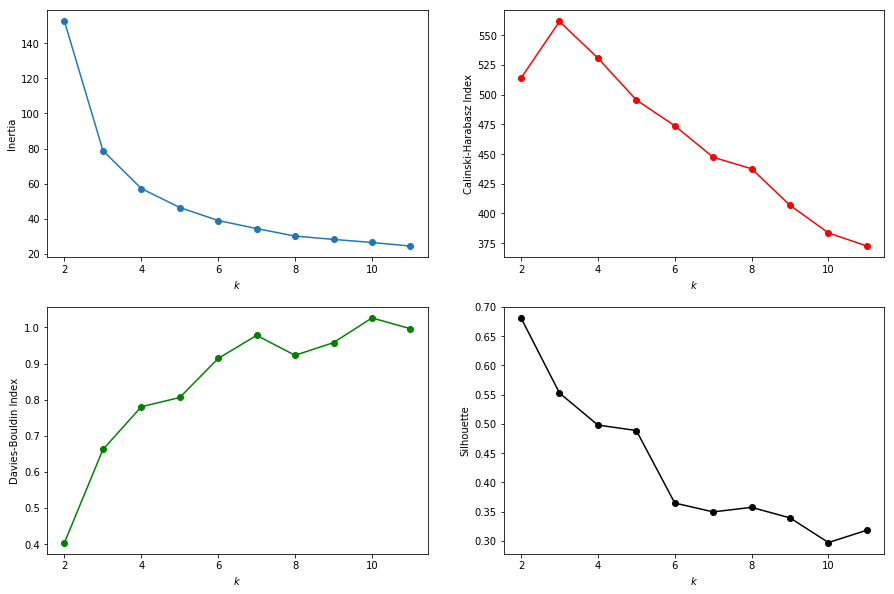

In [64]:
# Displaying the results of the internal validation criteria

X = file.iloc[:, [0, 1, 2, 3]].values

res = cluster_range(X, KMeans(random_state=42), 2, 11)
plot_internal(res['inertias'], res['chs'], res['dbi'], res['scs']);

**Observation**: As we can observe in the graphs, a point of inflection or the 'elbow' started occurring at $k=3$ for inertia, Davies-Bouldin, and sillhouette plots. Also, the Calinski-Harabasz index is at its highest at this value of $k$ which means that at this $k$, we have well-defined clustering. Thus, we can say that the optimal value of $k$ is **3**.

### Visualization of the data clustered into 3 clusters

We plot the **Sepal Length vs Sepal Width Graph** and **Petal Length vs Petal Width Graph** with **3** clustered data

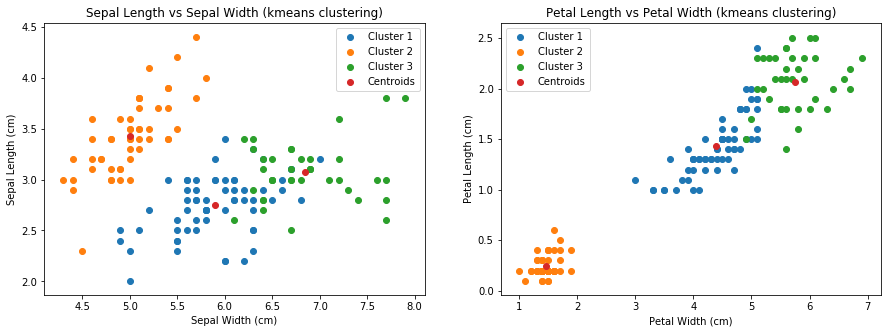

In [65]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

ax[0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            label = 'Cluster 1')
ax[0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            label = 'Cluster 2')
ax[0].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            label = 'Cluster 3')
# Plotting the centroids of the clusters
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            label = 'Centroids');

ax[1].scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
            label = 'Cluster 1')
ax[1].scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
            label = 'Cluster 2')
ax[1].scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
            label = 'Cluster 3')

# Plotting the centroids of the clusters
ax[1].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            label = 'Centroids');

ax[1].set_xlabel('Petal Width (cm)')
ax[1].set_ylabel('Petal Length (cm)')
ax[1].set_title('Petal Length vs Petal Width (kmeans clustering)')
ax[1].legend();

ax[0].set_xlabel('Sepal Width (cm)')
ax[0].set_ylabel('Sepal Length (cm)')
ax[0].set_title('Sepal Length vs Sepal Width (kmeans clustering)')
ax[0].legend();

From the dataset given, there are actually three classes of iris: **Iris-setosa**, **Iris-veriscolour**, and **Iris-virginica**. 

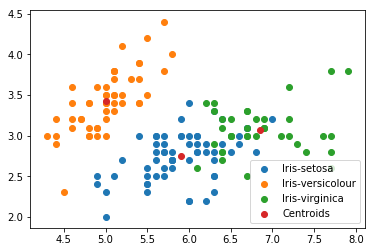

In [66]:
# Visualising the clusters - Sepal length vs sepal width
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            label = 'Centroids');

plt.legend();

#### References
[1] Scikit-learn. "2.3 Clustering". https://scikit-learn.org/stable/modules/clustering.html

[2] Ahmed Yahya Khaled. "Cluster Analysis with Iris Dataset." Retrieved from https://medium.com/swlh/cluster-analysis-with-iris-data-set-a7c4dd5f5d0